In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Project done by Sanika kulkarni

# **IMPORTING DEPENDENCIES**

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.preprocessing import StandardScaler

In [4]:
c_card=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
c_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
#DATA PREPROCESING

In [6]:
#sc= StandardScaler()
#f_card['Amount']=sc.fit_transform(pd.DataFrame(f_card['Amount']))


In [7]:
c_card.head() #top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
c_card.tail() #bottom 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
#CHECKING FOR DUPLCATE VALUES
c_card.duplicated().any()

True

In [10]:
#REMOVING DUPLICATE VALUES
f_card=c_card.drop_duplicates()

## **TOTAL ROWS AND COLUMNS**

In [11]:
f_card.shape
print("Number of Rows",f_card.shape[0])
print("Number of Columns",f_card.shape[1])

Number of Rows 283726
Number of Columns 31


### **FINDING OVERALL INFORMATION ABOUT DATASET**

In [12]:
f_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

0--->Legit Transactions
1---->Fraud Transactions

In [13]:
f_card['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: ylabel='count'>

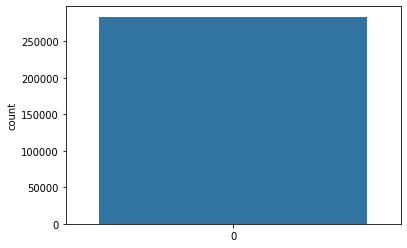

In [14]:
#CHECKING IF DATASET IS IMBALANCED OR NOT 
sns.countplot(f_card['Class'])

# **Separating Legit and Fraud Transactions For Analysis**

In [15]:
valid=f_card[f_card['Class']==0]
valid

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
Fraud=f_card[f_card['Class']==1]
Fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
print(valid.shape)
print(Fraud.shape)

(283253, 31)
(473, 31)


In [18]:
#STATISTICAL MEASURES
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
Fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#comparing both values
f_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# **UNDER SAMPLING**

# Building a sample dataset which contains equal distribution of valid and fraud transactions

In [21]:
v_frame=valid.sample(473)

In [22]:
new_f=pd.concat([v_frame,Fraud],axis=0) #concatenating two dataframes

In [23]:
new_f['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [24]:
new_f.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95797.875264,0.040292,0.020686,0.003766,0.066044,0.149889,-0.029486,0.008198,0.048597,0.075013,...,0.009775,0.030167,0.017720,-0.039565,0.034769,-0.041120,0.010501,-0.009738,0.001527,82.191036
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# **SPLITTING DATA INTO FEATURES & TARGETS**

# **X--> FEATURES**

#**Y--> TARGETS**

In [28]:
X= new_f.drop(columns='Class',axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
65418,51574.0,-0.416595,0.066499,3.016618,1.075424,-1.444085,0.326600,-0.369424,0.279898,0.989212,...,0.174308,0.038012,0.545468,-0.026752,1.025765,-0.017534,0.636808,0.049686,0.016527,55.00
174570,121971.0,2.072815,-0.274020,-1.461536,0.390729,0.169042,-0.451219,0.002638,-0.174516,0.911361,...,-0.214453,0.098887,0.527270,-0.001204,0.550820,0.245880,0.709438,-0.078027,-0.067661,11.50
233967,147773.0,-0.061524,1.277143,-0.620848,-0.237051,-0.183729,-0.100103,-1.651936,-5.530459,-0.551214,...,1.129849,-2.811148,0.016907,0.398716,0.034732,0.370857,0.196937,-0.073764,0.178161,1.98
182943,125593.0,-0.800653,1.072119,0.553027,0.768991,1.089571,-0.135424,1.485738,-0.175636,-1.205373,...,0.010911,0.102018,0.353101,-0.579067,-0.376136,1.125618,-0.192662,-0.086891,0.053693,57.55
203308,134760.0,2.118504,0.057788,-2.397690,0.553330,0.503891,-1.803430,0.876311,-0.532843,0.187764,...,-0.398615,0.250798,0.802344,-0.154004,0.027244,0.587319,0.732960,-0.136776,-0.097229,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [29]:
Y= new_f['Class']
Y

65418     0
174570    0
233967    0
182943    0
203308    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

# **SPLITTING DATASET INTO TRAINING AND TESTING DATA** 

In [30]:
x_train,x_test ,y_train ,y_test =train_test_split (X,Y,test_size=0.2,stratify=Y,random_state=2)

In [31]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86155,61108.0,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,-0.100523,...,-0.106945,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,101.50
137732,82300.0,-2.841951,2.885775,1.013026,1.436095,-0.737187,-0.162620,-1.607203,-2.091419,-1.035112,...,0.195295,-0.882370,0.503301,-0.001647,0.684363,-0.848975,-0.551904,-1.506796,0.089658,0.00
212514,138892.0,1.944686,0.495952,-1.477411,3.521471,1.065106,0.434591,0.316483,0.060436,-1.185126,...,-0.352069,0.275199,0.771005,-0.072600,0.273558,0.404875,0.273513,-0.078268,-0.074444,7.57
128361,78685.0,1.054235,0.074459,0.480627,1.346989,-0.215264,0.038532,0.006136,0.111844,0.014072,...,-0.129537,-0.020040,0.078875,-0.073629,0.246340,0.595869,-0.345806,0.031108,0.012729,36.00
149145,90676.0,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,...,-2.140874,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245556,152802.0,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,1.045007,...,0.585435,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,357.95
171565,120700.0,1.983128,-0.862707,-1.048141,-0.594428,-0.908542,-0.745332,-0.920332,-0.027642,-0.223551,...,0.140923,0.334134,0.920066,0.063348,-0.074795,-0.221666,-0.113211,0.019666,-0.012170,69.00
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53
190299,128773.0,-0.450685,0.594906,1.479905,-1.017686,-0.210919,-0.290294,0.223054,0.135041,0.443176,...,-0.212712,-0.071506,-0.322031,-0.027111,-0.030562,-0.338923,-0.315837,-0.250154,0.002408,0.68


In [32]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
182123,125266.0,-0.851297,0.666682,0.568273,0.686134,1.129951,2.479856,-0.056372,0.903296,0.154550,...,-0.249233,-0.329158,-0.640195,0.311518,-1.029940,-0.956404,-0.972047,-0.245071,-0.080703,15.99
43204,41413.0,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,-1.691482,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55
102415,68193.0,0.246255,-1.785322,1.198684,1.896209,-1.409216,1.611295,-0.707931,0.553006,1.498234,...,0.608168,0.223659,0.207484,-0.467057,-0.248789,0.330330,-0.237186,0.040781,0.091023,413.24
190368,128803.0,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,-1.297262,...,-0.031085,0.718504,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,175.90
68522,53031.0,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,...,0.351484,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234574,148028.0,-1.053840,4.362801,-6.023534,5.304534,1.480738,-2.193821,-1.530817,0.626857,-4.037021,...,0.531574,0.397954,-0.945402,-0.376138,-0.220480,0.264003,0.048935,0.847220,0.531932,0.00
252774,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77
17446,28722.0,-2.311424,-1.704859,1.404165,1.014480,-0.906435,-0.487176,-0.475450,0.634842,-1.225504,...,0.596773,0.211295,0.265852,0.562177,0.568461,-0.167049,-0.194959,0.284249,-0.077678,261.50
6359,7577.0,-1.524216,1.981468,1.327613,1.373672,-0.703062,-0.787532,-0.170852,0.521655,0.883888,...,0.259406,-0.175758,-0.016094,-0.032884,0.645612,-0.221608,-0.455395,0.229938,-0.060676,2.00


In [33]:
y_train

86155     1
137732    0
212514    0
128361    0
149145    1
         ..
245556    1
171565    0
281674    1
190299    0
150666    1
Name: Class, Length: 756, dtype: int64

In [34]:
y_test

182123    0
43204     1
102415    0
190368    1
68522     1
         ..
234574    1
252774    1
17446     0
6359      0
29488     0
Name: Class, Length: 190, dtype: int64

In [35]:
print(x_test.shape,x_train.shape,X.shape)

(190, 30) (756, 30) (946, 30)


# **SELECTING ALGORITHM**

In [36]:
#LOGISTIC REGRESSION

In [37]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
x_train_prediction = model.predict(x_train)
x_perdict_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy of training",x_perdict_accuracy)

Accuracy of training 0.9298941798941799


In [39]:
y_predict = model.predict(x_test)
accuracy_score1 = accuracy_score(y_test,y_predict)
print("Accuracy of testing",accuracy_score1)


Accuracy of testing 0.9315789473684211


In [40]:
p_score= precision_score(y_test,y_predict)
print("Pecision_Score",p_score)

Pecision_Score 0.9659090909090909


In [41]:
r_score= recall_score(y_test,y_predict)
print("Recall_Score",r_score)

Recall_Score 0.8947368421052632


In [42]:
f1score= f1_score(y_test,y_predict)
print("f1_Score",f1score)

f1_Score 0.9289617486338798


**DECISION TREE CLASSIFIER**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
x_train_prediction2 = dt.predict(x_train)
a_s2 = accuracy_score(x_train_prediction2,y_train)
print("Accuracy of training",a_s2)

Accuracy of training 1.0


In [45]:
y_predict1 = dt.predict(x_test)
y_predict_a = accuracy_score(y_predict1,y_test)
p_score1= precision_score(y_predict1,y_test)
r_score1= recall_score(y_predict1,y_test)
f1score1= f1_score(y_predict1,y_test)
print("Accuracy of testing",y_predict_a)
print("Pecision_Score",p_score1)
print("Recall_Score",r_score1)
print("f1_Score",f1score1)

Accuracy of testing 0.9
Pecision_Score 0.8947368421052632
Recall_Score 0.9042553191489362
f1_Score 0.8994708994708994


In [46]:
#RANDOM FOREST CLASIFIER

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
x_train_prediction4 = rf.predict(x_train)
x_perdict_accuracy4 = accuracy_score(x_train_prediction4,y_train)
print("Accuracy of training",x_perdict_accuracy4)

Accuracy of training 1.0


In [49]:
y_predict2 = rf.predict(x_test)
y_predict_a1 = accuracy_score(y_predict2,y_test)
p_score2= precision_score(y_predict2,y_test)
r_score2= recall_score(y_predict2,y_test)
f1score2= f1_score(y_predict2,y_test)
print("Accuracy of testing",y_predict_a1)
print("Pecision_Score",p_score2)
print("Recall_Score",r_score2)
print("f1_Score",f1score2)

Accuracy of testing 0.9421052631578948
Pecision_Score 0.8947368421052632
Recall_Score 0.9883720930232558
f1_Score 0.9392265193370165


In [50]:
data = [['Logistic Regression', accuracy_score(y_test,y_predict)*100], ['Decision Tree',accuracy_score(y_predict1,y_test)*100 ], ['Random Forest',accuracy_score(y_predict2,y_test)*100]]
# Create the pandas DataFrame
f_data= pd.DataFrame(data, columns=['Models', 'Accuracy'])
f_data


,Models,Accuracy
0,Logistic Regression,93.157895
1,Decision Tree,90.000000
2,Random Forest,94.210526


In [52]:
X=f_card.drop(columns='Class',axis=1)
Y=f_card["Class"]

**OVERSAMPLING**

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
x_res,y_res=SMOTE().fit_resample(X,Y)

In [55]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [56]:
x_train,x_test ,y_train ,y_test =train_test_split (x_res,y_res,test_size=0.2,random_state=2)

In [57]:
#LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
x_train_prediction = model.predict(x_train)
x_perdict_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy of training",x_perdict_accuracy)

Accuracy of training 0.9571826373994934


In [59]:
y_predict = model.predict(x_test)
accuracy_score1 = accuracy_score(y_test,y_predict)
print("Accuracy of testing",accuracy_score1)

Accuracy of testing 0.9565938818379199


In [60]:
p_score= precision_score(y_test,y_predict)
print("Pecision_Score",p_score)

Pecision_Score 0.9679215700409091


In [61]:
r_score= recall_score(y_test,y_predict)
print("Recall_Score",r_score)

Recall_Score 0.9447991978468521


In [62]:
f1score= f1_score(y_test,y_predict)
print("f1_Score",f1score)

f1_Score 0.9562206238427574


**DECISION TREE CLASSIFIER**

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
x_train_prediction2 = dt.predict(x_train)
a_s2 = accuracy_score(x_train_prediction2,y_train)
print("Accuracy of training",a_s2)

Accuracy of training 1.0


In [65]:
y_predict1 = dt.predict(x_test)
y_predict_a = accuracy_score(y_predict1,y_test)
p_score1= precision_score(y_predict1,y_test)
r_score1= recall_score(y_predict1,y_test)
f1score1= f1_score(y_predict1,y_test)
print("Accuracy of testing",y_predict_a)
print("Pecision_Score",p_score1)
print("Recall_Score",r_score1)
print("f1_Score",f1score1)

Accuracy of testing 0.9983407177278424
Pecision_Score 0.9988917620982638
Recall_Score 0.9978035108682283
f1_Score 0.9983473399205317


**RANDOM FOREST CLASIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
x_train_prediction4 = rf.predict(x_train)
x_perdict_accuracy4 = accuracy_score(x_train_prediction4,y_train)
print("Accuracy of training",x_perdict_accuracy4)

In [ ]:
y_predict2 = rf.predict(x_test)
y_predict_a1 = accuracy_score(y_predict2,y_test)
p_score2= precision_score(y_predict2,y_test)
r_score2= recall_score(y_predict2,y_test)
f1score2= f1_score(y_predict2,y_test)
print("Accuracy of testing",y_predict_a1)
print("Pecision_Score",p_score2)
print("Recall_Score",r_score2)
print("f1_Score",f1score2)

In [ ]:
data = [['Logistic Regression', accuracy_score(y_test,y_predict)*100], ['Decision Tree',accuracy_score(y_predict1,y_test)*100 ], ['Random Forest',accuracy_score(y_predict2,y_test)*100]]
# Create the pandas DataFrame
f_data= pd.DataFrame(data, columns=['Models', 'Accuracy'])
f_data


SAVING THE MODEL

In [ ]:
rf1=RandomForestClassifier()
rf1.fit(x_res,y_res)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf1,"Credit_Card_Model")

In [ ]:
model1 = joblib.load("Credit_Card_Model")

In [ ]:
prediction = model1.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [ ]:
if prediction == 0:
    print("It is Normal Transcation")
else:
    print("It is Fraudulent Transcation")